# Labels Addition and Statistics

This notebook adds labels to spectra and makes some statistics about classes.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import collections
import math
import matplotlib.pyplot as plt
import h5py
import csv

In [3]:
LABELS_FILE = 'data/ondrejov-dataset.csv'

In [4]:
with open(LABELS_FILE, newline='') as f:
    labels = list(csv.DictReader(f))

## Counts

Make bar chart to see structure of the dataset.

Counter({'1': 6103, '0': 5301, '3': 1533, '2': 398})
0 is 39.75%
2 is 2.98%
1 is 45.77%
3 is 11.5%


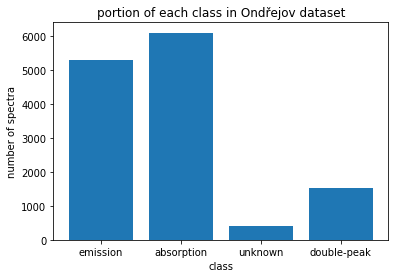

In [14]:
counts = collections.Counter(map(lambda x: x['label'], labels))
print(counts)

for label, cnt in counts.items():
    percents = cnt / len(labels) * 100
    print('{} is {}%'.format(label, round(percents, 2)))

idx = np.arange(len(counts))
rects = plt.bar(idx, list(map(lambda x: x[1], sorted(counts.items()))))
plt.xticks(idx, ('emission', 'absorption', 'unknown', 'double-peak'))
plt.ylabel('number of spectra')
plt.xlabel('class')
plt.title('portion of each class in Ondřejov dataset');

## Classes Preview

In [6]:
f = h5py.File('data/data.hdf5')
spectra = f['spectra']

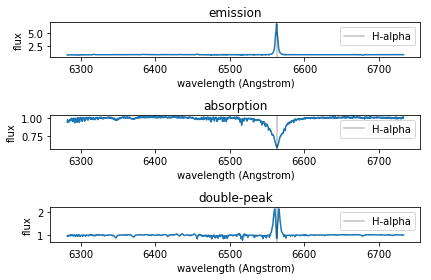

In [7]:
def plot_class(spectrum, ax, class_name):
    ax.plot(spectrum[0], spectrum[1])
    ax.set_title(class_name)
    ax.set_xlabel('wavelength (Angstrom)')
    ax.set_ylabel('flux')
    ax.axvline(x=6562.8, color='black', label='H-alpha', alpha=0.25)
    ax.legend()

fig, axs = plt.subplots(3, 1)
idents = ['lb160035', 'a201403300026', 'si220021']
classes = ['emission', 'absorption', 'double-peak']

for ident, ax, cl in zip(idents, axs, classes):
    plot_class(spectra[ident], ax, cl)

fig.tight_layout()

# Let's Add Labels

Add labels to the HDF5 file.

In [16]:
for spectrum in labels:
    ident = spectrum['id'].split('/')[-1]
    spectra[ident].attrs['label'] = int(spectrum['label'])

NameError: name 'spectra' is not defined

## Vizualize All Spectra in a Class

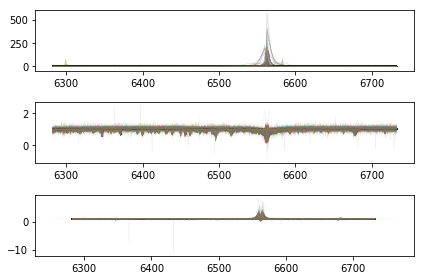

In [9]:
fig, (ax0, ax1, ax3) = plt.subplots(3, 1)
axs = [ax0, ax1, None, ax3]

for ident, data in spectra.items():
    label = spectra[ident].attrs['label']
    if label == 2:
        continue
    axs[label].plot(data[0], data[1], alpha=0.1, lw=0.5)

fig.tight_layout()

## Wavelength Ranges

### Infimum

This analysis shows that the infimum from starting wavelengths is 6518.4272.
That is pretty high but H-alpha is 6562.8 and H-alpha is the main feature. 
It may shorten the range of value and thus speed up training.
I also reviewed some spectra and it is far enough from H-alpha.
Therefore **6519 Angstrom** should be choosen as starting wavelength.

In [10]:
# find spectrum which start with highest value
# x is tuple x[1] are values, [0, 0] is first wavelength
wave_starts = dict(map(lambda x: (x[0], x[1][0, 0]), spectra.items()))

(array([  1.00000000e+00,   1.32040000e+04,   1.50000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.11000000e+02,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ 6252.9091022 ,  6279.46090137,  6306.01270053,  6332.5644997 ,
         6359.11629887,  6385.66809804,  6412.21989721,  6438.77169638,
         6465.32349555,  6491.87529472,  6518.42709388]))

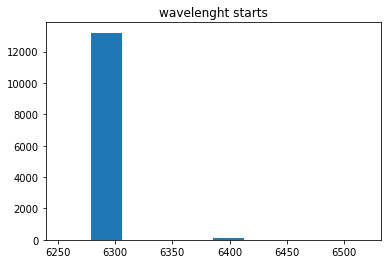

In [11]:
starts_n, starts_bins, _ = plt.hist(list(wave_starts.values()))
plt.title('wavelenght starts')
starts_n, starts_bins

In [12]:
infimum = list(reversed(sorted(wave_starts.items(), key=lambda x: x[1])))[0][1]
print('infimum:', math.ceil(infimum), 'Angstrom')

infimum: 6519 Angstrom


In [13]:
list(reversed(sorted(wave_starts.items(), key=lambda x: x[1])))[:10]

[('la220044', 6518.4270938848103),
 ('a201504060008', 6491.1356048268599),
 ('a201504060037', 6490.8671410957604),
 ('td210007', 6454.3966278825301),
 ('qd260023', 6411.4690039360503),
 ('qd120025', 6409.84353268212),
 ('a201407220020', 6407.2816559277999),
 ('pk230012', 6406.88118195878),
 ('pk230013', 6406.8809238313397),
 ('pk230010', 6406.8804235828002)]

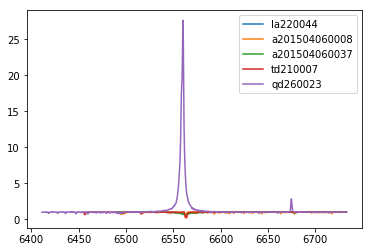

In [14]:
def plot_spectrum(ident):
    spectrum = spectra[ident]
    plt.plot(spectrum[0], spectrum[1], label=ident)

plot_spectrum('la220044')
plot_spectrum('a201504060008')
plot_spectrum('a201504060037')
plot_spectrum('td210007')
plot_spectrum('qd260023')
plt.legend();

### Supremum

At ends there is no problem because most of spectra are is first bar.

In [15]:
# find spectrum which end with lowest value
# x is tuple x[1] are values, [0, 0] is first wavelength
wave_ends = dict(map(lambda x: (x[0], x[1][0, -1]), spectra.items()))

(array([  1.33340000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 6732.74340225,  6735.99299611,  6739.24258998,  6742.49218384,
         6745.74177771,  6748.99137157,  6752.24096544,  6755.4905593 ,
         6758.74015317,  6761.98974703,  6765.2393409 ]))

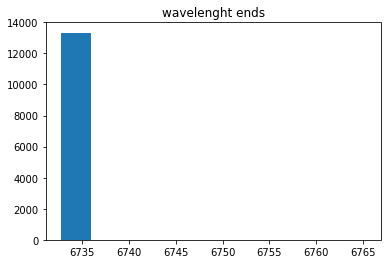

In [16]:
ends_n, ends_bins, _ = plt.hist(list(wave_ends.values()))
plt.title('wavelenght ends')
ends_n, ends_bins

In [17]:
supremum = list(sorted(wave_ends.items(), key=lambda x: x[1]))[0][1]
print('supremum:', math.floor(supremum), 'Angstrom')

supremum: 6732 Angstrom


In [18]:
list(sorted(wave_ends.items(), key=lambda x: x[1]))[:10]

[('pb060015', 6732.7434022481166),
 ('rk030029', 6732.743426767669),
 ('ui290013', 6732.7434756362609),
 ('vi280028', 6732.7434979324626),
 ('wd250071', 6732.7435241209596),
 ('vh200045', 6732.7435991070324),
 ('pi100014', 6732.7436716371749),
 ('nk240012', 6732.7437008820671),
 ('wd250070', 6732.7437669786104),
 ('lb160035', 6732.7437786085102)]

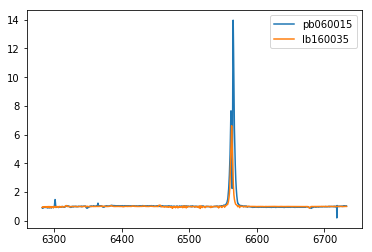

In [19]:
plot_spectrum('pb060015')
plot_spectrum('lb160035')
plt.legend();

In [20]:
f.close()